In [33]:
import pandas as pd
import seaborn as sns
import joblib
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, HuberRegressor, LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer

from xgboost import XGBRegressor

In [2]:
# Load the magical datasets
hagrids_hut = "coords_diamonds.csv"
diagon_alley = "diamonds.csv"

# Read the magical datasets
spell_coords = pd.read_csv(hagrids_hut)
spell_diamonds = pd.read_csv(diagon_alley)


In [3]:
# Display magical information about df_coords
spell_coords.info()
print("_____________________________")
# Display magical information about df_diamond
spell_diamonds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53930 entries, 0 to 53929
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53930 non-null  int64  
 1   latitude    53930 non-null  object 
 2   longitude   53930 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ MB
_____________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53930 entries, 0 to 53929
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53930 non-null  int64  
 1   carat       53930 non-null  float64
 2   cut         53930 non-null  object 
 3   color       53930 non-null  object 
 4   clarity     53930 non-null  object 
 5   depth       50968 non-null  float64
 6   table       53930 non-null  float64
 7   price       53930 non-null  int64  
 8   x           52840 non-null  float64
 9   y           53345 non-null  fl

In [4]:
# Perform a magical inner join on the  numeric column
merged_spell_df = pd.merge(spell_coords, spell_diamonds, on=spell_coords.columns[0], how='inner', validate="one_to_one")

# Rename the columns to make them more magical
merged_spell_df = merged_spell_df.rename(columns={"Unnamed: 0": "spell_id"})

# Display the merged magical DataFrame
merged_spell_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53930 entries, 0 to 53929
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   spell_id    53930 non-null  int64  
 1   latitude    53930 non-null  object 
 2   longitude   53930 non-null  float64
 3   carat       53930 non-null  float64
 4   cut         53930 non-null  object 
 5   color       53930 non-null  object 
 6   clarity     53930 non-null  object 
 7   depth       50968 non-null  float64
 8   table       53930 non-null  float64
 9   price       53930 non-null  int64  
 10  x           52840 non-null  float64
 11  y           53345 non-null  float64
 12  z           53930 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 5.3+ MB


In [5]:
merged_spell_df.head(10)

,spell_id,latitude,longitude,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,39.8813889,-83.093056,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,33.4150000,-111.548889,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,40.1672222,-105.101389,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,37.3711111,-85.583056,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,48.5394444,-121.745000,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,5,38.7705556,-81.553333,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,6,35.5780556,-108.321389,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,7,53.916667,-122.766667,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,8,33.3869444,-84.283056,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,9,47.6063889,-122.330833,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [6]:
# Print the magical names of all columns in the DataFrame
print("Names of all magical columns:")
print(merged_spell_df.columns)


Names of all magical columns:
Index(['spell_id', 'latitude', 'longitude ', 'carat', 'cut', 'color',
       'clarity', 'depth', 'table', 'price', 'x', 'y', 'z'],
      dtype='object')


In [8]:
# Rename the magical columns with a flourish of the wand
merged_spell_df = merged_spell_df.rename(columns={'longitude ': 'longitude', 
                                                  'x': 'x_length',
                                                  'y': 'y_width',
                                                  'z': 'z_depth'})
# Wave the wand and banish the "id" column from existence
merged_spell_df = merged_spell_df.drop(columns=['spell_id'])


In [57]:
print("Nombres de todas las columnas:")
print(merged_df.columns)


Nombres de todas las columnas:
Index(['latitude', 'longitude', 'carat', 'cut', 'color', 'clarity', 'depth',
       'table', 'price', 'x_length', 'y_width', 'z_depth'],
      dtype='object')


In [58]:
na_count = merged_df.isna().sum()
print(na_count)

latitude        0
longitude       0
carat           0
cut             0
color           0
clarity         0
depth        2962
table           0
price           0
x_length     1090
y_width       585
z_depth         0
dtype: int64


In [9]:
# Identify diamonds with magical missing values in key columns
suspect_diamonds = merged_spell_df[(merged_spell_df['depth'].isna()) | 
                                   (merged_spell_df['x_length'].isna()) | 
                                   (merged_spell_df['y_width'].isna())]

# Show magical information about the identified diamonds
print("Number of suspect diamonds:", len(suspect_diamonds))
print("\nInformation about the suspect diamonds:")
display(suspect_diamonds.head())

Number of suspect diamonds: 2962

Information about the suspect diamonds:


,latitude,longitude,carat,cut,color,clarity,depth,table,price,x_length,y_width,z_depth
19,41.6005556,-93.608889,0.3,Very Good,J,SI1,NaN,59.0,351,4.21,4.27,2.66
73,53.766667,-2.350000,0.3,Premium,H,SI1,NaN,57.0,554,NaN,NaN,2.67
104,53.55,-113.500000,0.8,Ideal,I,VS1,NaN,56.0,2760,5.94,5.87,3.72
110,20.9083333,-156.227500,0.8,Ideal,F,SI2,NaN,57.0,2761,5.96,6.00,3.67
116,41.8005556,-73.121667,0.8,Premium,F,SI2,NaN,58.0,2762,5.98,5.94,3.68


In [10]:
# Check for duplicates in the enchanted DataFrame
if merged_spell_df.duplicated().any():
    print("The magical DataFrame has duplicate rows.")
else:
    print("The magical DataFrame has no duplicate rows.")

The magical DataFrame has no duplicate rows.


In [11]:
# Show the unique magical values in the 'cut' column
cut_values = merged_spell_df['cut'].unique()
print("Unique magical values in the 'cut' column:")
print(cut_values)

# Show the unique magical values in the 'color' column
color_values = merged_spell_df['color'].unique()
print("\nUnique magical values in the 'color' column:")
print(color_values)

# Show the unique magical values in the 'clarity' column
clarity_values = merged_spell_df['clarity'].unique()
print("\nUnique magical values in the 'clarity' column:")
print(clarity_values)


Unique magical values in the 'cut' column:
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair' 'Very Goo!d' "P*'remium"
 'I#deal' '#Very Good' 'P?remium' "*'Ideal" '!Good' 'Pre!mium' 'Pr?emium'
 'Very Go#od' 'Ide&al' 'Ide!al' 'Id!eal' '&Premium' 'Go?od' 'G#ood'
 "Very *'Good" "Ide*'al" 'V&ery Good' '&Ideal' 'Very G#ood']

Unique magical values in the 'color' column:
['E' 'I' 'J' 'H' 'F' 'G' 'D' "*'E" '#F' '&G' '!H' '?J' '#D' '&I' '!I' '?G'
 '#H' '?H' '?E' "*'F" '!E' '&F' '#G' "*'I" '!F' '&E']

Unique magical values in the 'clarity' column:
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF' 'S?I1' 'SI!1' '&VS2'
 '&SI2' "S*'I1" 'VS?1' "S*'I2" '#VS1' 'V&S2' 'V!S2' '!VS2' 'VS#2' "VVS*'2"
 "*'SI2" 'VV?S1' 'S&I1' "*'SI1" 'SI?1' 'VV#S1' 'V#S2' '#SI!1' 'S!I2']


In [12]:
# Define the magical correction function using regular expressions
def magical_correction_like(column, correction_patterns):
    for pattern, correction in correction_patterns.items():
        column = column.str.replace(pattern, correction, regex=True)
    return column

# Common correction patterns for all columns
common_correction_patterns = {
    '!|#|\?|\*|&': '',  # Vanish special characters
    "[^a-zA-Z0-9\s]": '',  # Vanish all characters except letters, numbers, or spaces
    "^\s*'|'\s*$": ''  # Vanish single quotes at the start or end of the string
}

# Apply correction using the defined magical function
for column in ['cut', 'color', 'clarity']:
    merged_spell_df[column] = magical_correction_like(merged_spell_df[column], common_correction_patterns)

# Show the unique magical values in each corrected column
for column in ['cut', 'color', 'clarity']:
    unique_values = merged_spell_df[column].unique()
    print(f"Unique magical values in the '{column}' column:")
    print(unique_values)
    print()


Unique magical values in the 'cut' column:
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']

Unique magical values in the 'color' column:
['E' 'I' 'J' 'H' 'F' 'G' 'D']

Unique magical values in the 'clarity' column:
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']



In [13]:
# Initialize the magical encoder
label_encoder = LabelEncoder()

# Apply the enchanting encoding to the categorical columns
merged_spell_df['cut_encoded'] = label_encoder.fit_transform(merged_spell_df['cut'])
merged_spell_df['color_encoded'] = label_encoder.fit_transform(merged_spell_df['color'])
merged_spell_df['clarity_encoded'] = label_encoder.fit_transform(merged_spell_df['clarity'])

# Show the first few enchanted records to verify the changes
display(merged_spell_df[['cut', 'cut_encoded', 'color', 'color_encoded', 'clarity', 'clarity_encoded']].head())


,cut,cut_encoded,color,color_encoded,clarity,clarity_encoded
0,Ideal,2,E,1,SI2,3
1,Premium,3,E,1,SI1,2
2,Good,1,E,1,VS1,4
3,Premium,3,I,5,VS2,5
4,Good,1,J,6,SI2,3


In [14]:
# Show the unique magical values in each corrected column
for column in ['cut', 'cut_encoded', 'color', 'color_encoded', 'clarity', 'clarity_encoded']:
    unique_values = merged_spell_df[column].unique()
    print(f"Unique magical values in the '{column}' column:")
    print(unique_values)
    print()


Unique magical values in the 'cut' column:
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']

Unique magical values in the 'cut_encoded' column:
[2 3 1 4 0]

Unique magical values in the 'color' column:
['E' 'I' 'J' 'H' 'F' 'G' 'D']

Unique magical values in the 'color_encoded' column:
[1 5 6 4 2 3 0]

Unique magical values in the 'clarity' column:
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']

Unique magical values in the 'clarity_encoded' column:
[3 2 4 5 7 6 0 1]



In [15]:
# List of columns to be enchanted and converted
columns_to_convert = ['latitude']

# With a flick of the wand, convert the columns to the correct data type
merged_spell_df[columns_to_convert] = merged_spell_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the magical information about the DataFrame after the enchantment
merged_spell_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53930 entries, 0 to 53929
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         53929 non-null  float64
 1   longitude        53930 non-null  float64
 2   carat            53930 non-null  float64
 3   cut              53930 non-null  object 
 4   color            53930 non-null  object 
 5   clarity          53930 non-null  object 
 6   depth            50968 non-null  float64
 7   table            53930 non-null  float64
 8   price            53930 non-null  int64  
 9   x_length         52840 non-null  float64
 10  y_width          53345 non-null  float64
 11  z_depth          53930 non-null  float64
 12  cut_encoded      53930 non-null  int32  
 13  color_encoded    53930 non-null  int32  
 14  clarity_encoded  53930 non-null  int32  
dtypes: float64(8), int32(3), int64(1), object(3)
memory usage: 5.6+ MB


In [16]:
# Create a DataFrame filled with magical suspicious data
df_suspicious = merged_spell_df[merged_spell_df.isnull().any(axis=1)]

# Save this enchanted DataFrame into a separate file
df_suspicious.to_csv('df_suspicious.csv', index=False)

# With a spell, banish the rows with null values from the original DataFrame
cleaned_df = merged_spell_df.dropna()


In [17]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50967 entries, 0 to 53928
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         50967 non-null  float64
 1   longitude        50967 non-null  float64
 2   carat            50967 non-null  float64
 3   cut              50967 non-null  object 
 4   color            50967 non-null  object 
 5   clarity          50967 non-null  object 
 6   depth            50967 non-null  float64
 7   table            50967 non-null  float64
 8   price            50967 non-null  int64  
 9   x_length         50967 non-null  float64
 10  y_width          50967 non-null  float64
 11  z_depth          50967 non-null  float64
 12  cut_encoded      50967 non-null  int32  
 13  color_encoded    50967 non-null  int32  
 14  clarity_encoded  50967 non-null  int32  
dtypes: float64(8), int32(3), int64(1), object(3)
memory usage: 5.6+ MB


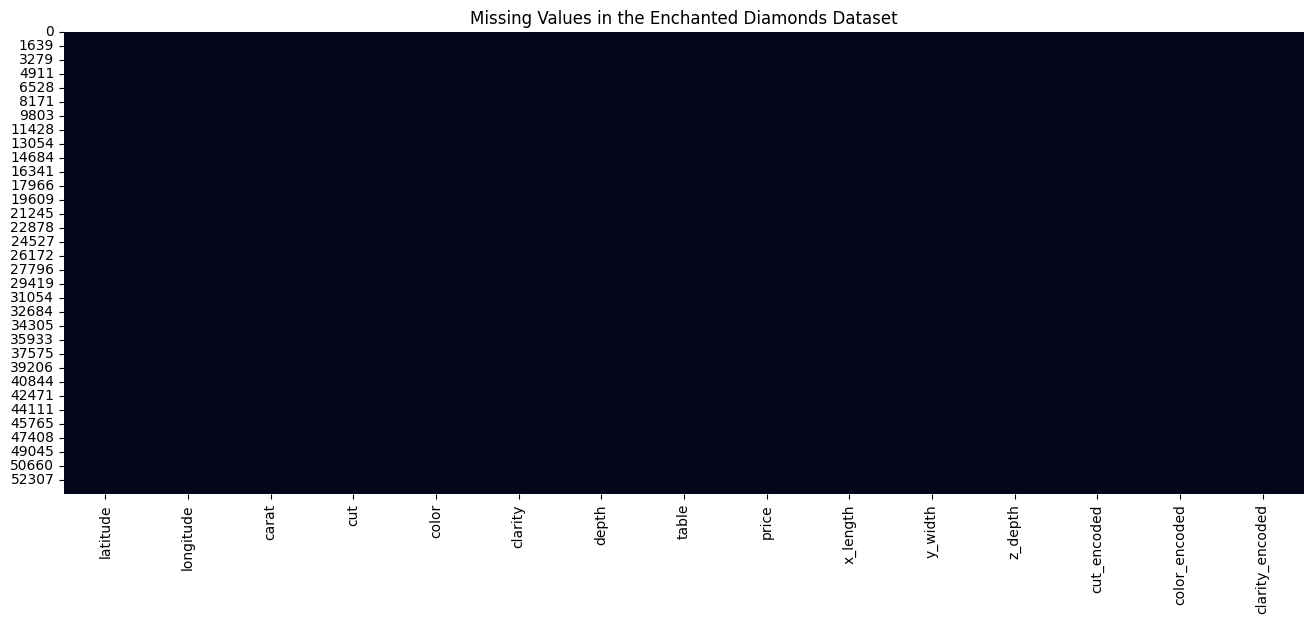

In [18]:
# With a magical incantation, visualize the heatmap to check for any lingering missing values after imputation
plt.figure(figsize=(16, 6))
sns.heatmap(cleaned_df.isnull(), cbar=False)
plt.title('Missing Values in the Enchanted Diamonds Dataset')
plt.show()


In [19]:
# Create a magical copy of the cleaned DataFrame
cleaned_df_copy = cleaned_df.copy()

#  With a flick of the wand, let's calculate the frequencies of values in 'cut' and 'cut_encoded'
cut_counts_sorted = cleaned_df_copy.groupby(['cut', 'cut_encoded']).size().reset_index(
    name='Frequency').sort_values(by='cut_encoded')

# Display the enchanted DataFrame sorted
print("Frequencies of values in 'cut' and 'cut_encoded' sorted by 'Cut_encoded':")
display(cut_counts_sorted)


Frequencies of values in 'cut' and 'cut_encoded' sorted by 'Cut_encoded':


,cut,cut_encoded,Frequency
0,Fair,0,1518
1,Good,1,4644
2,Ideal,2,20291
3,Premium,3,13075
4,Very Good,4,11439


In [20]:
# With a flick of the wand, let's calculate the frequencies of values in 'color' and 'color_encoded' and sort by 'color_encoded'
color_counts_sorted = cleaned_df_copy.groupby(['color', 'color_encoded']).size().reset_index(
    name='Frequency').sort_values(by='color_encoded')

# Display the enchanted DataFrame sorted
print("Frequencies of values in 'color' and 'color_encoded' sorted by 'Color_encoded':")
display(color_counts_sorted)


Frequencies of values in 'color' and 'color_encoded' sorted by 'Color_encoded':


,color,color_encoded,Frequency
0,D,0,6398
1,E,1,9256
2,F,2,9031
3,G,3,10630
4,H,4,7886
5,I,5,5114
6,J,6,2652


In [21]:
# Let's conjure up the frequencies of values in 'clarity' and 'clarity_encoded'
clarity_counts = cleaned_df_copy[['clarity', 'clarity_encoded']].value_counts().reset_index()
clarity_counts.columns = ['clarity', 'clarity_encoded', 'Frequency']

# Display the enchanted DataFrame with the values and their frequencies
print("Frequencies of values in 'clarity' and 'clarity_encoded':")
display(clarity_counts)


Frequencies of values in 'clarity' and 'clarity_encoded':


,clarity,clarity_encoded,Frequency
0,SI1,2,12374
1,VS2,5,11547
2,SI2,3,8700
3,VS1,4,7709
4,VVS2,7,4804
5,VVS1,6,3440
6,IF,1,1684
7,I1,0,709


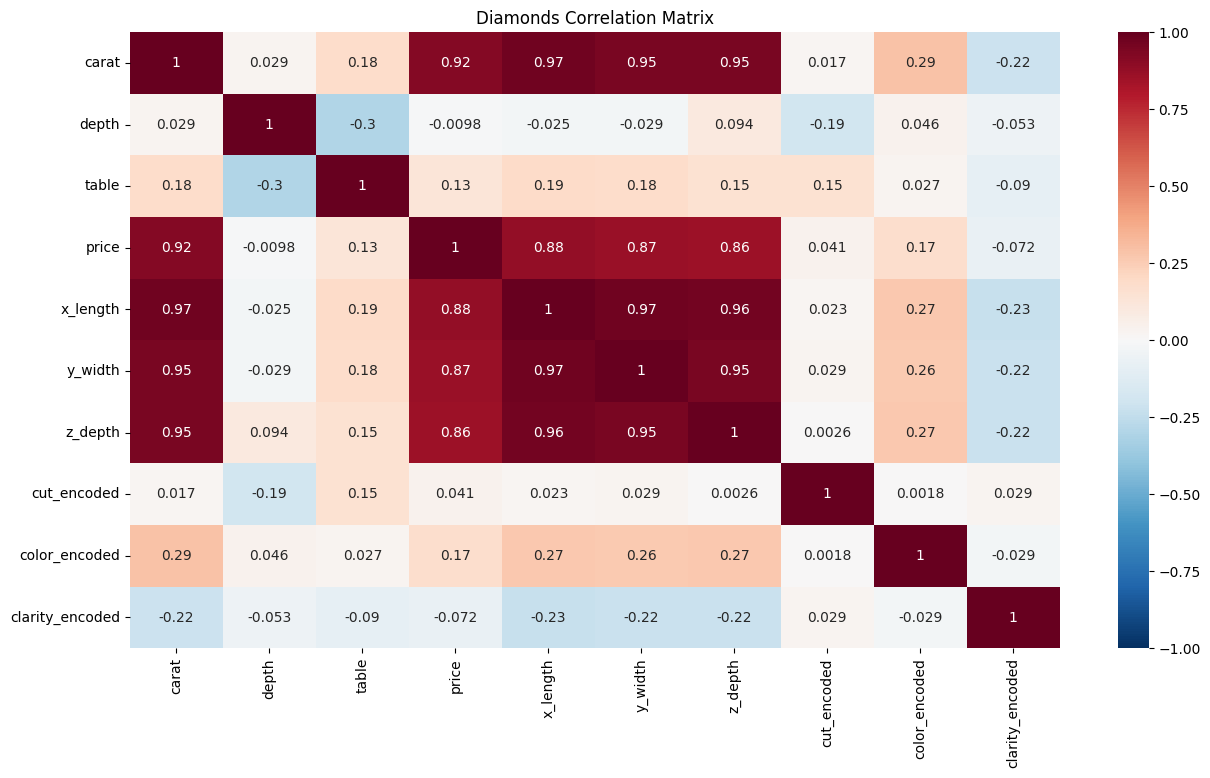

In [22]:
# Select only the relevant numerical columns for the correlation matrix
numeric_columns = cleaned_df[['carat', 'depth', 'table', 'price', 'x_length', 'y_width', 'z_depth', 'cut_encoded',
                             'color_encoded', 'clarity_encoded']]

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# With a wave of the wand, let's visualize the correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Diamonds Correlation Matrix')
plt.show()


In [23]:
# Conjure a new DataFrame without the magical attributes 'cut', 'color', and 'clarity'
X = cleaned_df.drop(['latitude', 'longitude', 'cut', 'color', 'clarity', 'price'], axis=1)
# Cast a spell to extract the 'price' column for prediction
y = cleaned_df['price']


In [24]:
# Split the enchanted dataset into training and testing sets, casting a spell of randomness
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [25]:
# Conjuring pipelines for different regression models, each imbued with its own magical properties
pipelines = [
    Pipeline([("scaler", StandardScaler()), ("regressor", LinearRegression())]),  # Summoning the Linear Regression model
    Pipeline([("scaler", StandardScaler()), ("regressor", Ridge())]),  # Casting the Ridge Regression spell
    Pipeline([("scaler", StandardScaler()), ("regressor", Lasso())]),  # Conjuring the Lasso Regression charm
    Pipeline([("scaler", StandardScaler()), ("regressor", ElasticNet())]),  # Invoking the Elastic Net Regression incantation
    Pipeline([("scaler", StandardScaler()), ("regressor", DecisionTreeRegressor())]),  # Channeling the Decision Tree Regression enchantment
    Pipeline([("scaler", StandardScaler()), ("regressor", RandomForestRegressor())]),  # Crafting the RandomForest Regression potion
    Pipeline([("scaler", StandardScaler()), ("regressor", GradientBoostingRegressor())]),  # Concocting the Gradient Boosting Regression elixir
    Pipeline([("scaler", StandardScaler()), ("regressor", AdaBoostRegressor())]),  # Brewing the AdaBoost Regression concoction
    Pipeline([("scaler", StandardScaler()), ("regressor", KNeighborsRegressor())]),  # Conjuring the K-Nearest Neighbors Regression spell
    Pipeline([("scaler", StandardScaler()), ("regressor", XGBRegressor())]),  # Summoning the XGBoost Regression wizardry
    Pipeline([("scaler", StandardScaler()), ("regressor", SVR())]),  # Evoking the Support Vector Regression magic
    Pipeline([("scaler", StandardScaler()), ("regressor", HuberRegressor())])  # Channeling the Huber Regression incantation
]


In [26]:
# Training and evaluating each magical model, unleashing their powers upon the dataset
for i, pipeline in enumerate(pipelines):
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Evaluate the model using cross-validation
    cv_score = cross_val_score(pipeline, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
    print(f"Model {i}: Average RMSE: {cv_score.mean():.2f}")


Model 0: Average RMSE: -1364.39
Model 1: Average RMSE: -1364.36
Model 2: Average RMSE: -1364.02
Model 3: Average RMSE: -1710.71
Model 4: Average RMSE: -751.56
Model 5: Average RMSE: -555.97
Model 6: Average RMSE: -675.27
Model 7: Average RMSE: -1336.11
Model 8: Average RMSE: -831.33
Model 9: Average RMSE: -555.85
Model 10: Average RMSE: -2909.73
Model 11: Average RMSE: -1450.48


In [27]:
# Retrieve the magical model corresponding to "Model 5" from the list of pipelines
modelo_5 = pipelines[5]

# Print the description of the enchanted model
print("Modelo 5:", modelo_5)


Modelo 5: Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor())])


In [28]:
# Save the enchanted "Modelo 5" using the magical joblib
joblib.dump(modelo_5, 'modelo_5_random_forest.pkl')


['modelo_5_random_forest.pkl']

In [29]:
# Restore the enchanted "Modelo 5" using the magical joblib
modelo_5 = joblib.load('modelo_5_random_forest.pkl')

# Perform prediction on the test data, unleashing the model's magical powers
pred = modelo_5.predict(X_test)
print(pred)


[10600.12 14725.67 13843.35 ...  2926.79  3970.76 10705.92]


In [30]:
# Perform prediction on the test data, unleashing the model's magical powers
pred = modelo_5.predict(X_test)

# Calculate R^2, a measure of the model's predictive power
r2 = r2_score(y_test, pred)

# Calculate adjusted R^2, a measure that considers the number of predictors
n = len(X_test)  # Number of samples
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate MAE (Mean Absolute Error), a measure of the average prediction error
mae = mean_absolute_error(y_test, pred)

# Calculate MSE (Mean Squared Error), a measure of the average squared prediction error
mse = mean_squared_error(y_test, pred)

# Calculate RMSE (Root Mean Squared Error), a measure of the average squared prediction error
rmse = mean_squared_error(y_test, pred, squared=False)

# Print the results, unveiling the model's performance metrics
print("R^2:", r2)
print("Adjusted R^2:", adjusted_r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


R^2: 0.9813280668022296
Adjusted R^2: 0.9813148679804593
MAE: 274.5236002066656
MSE: 300016.24182540405
RMSE: 547.7373839947426


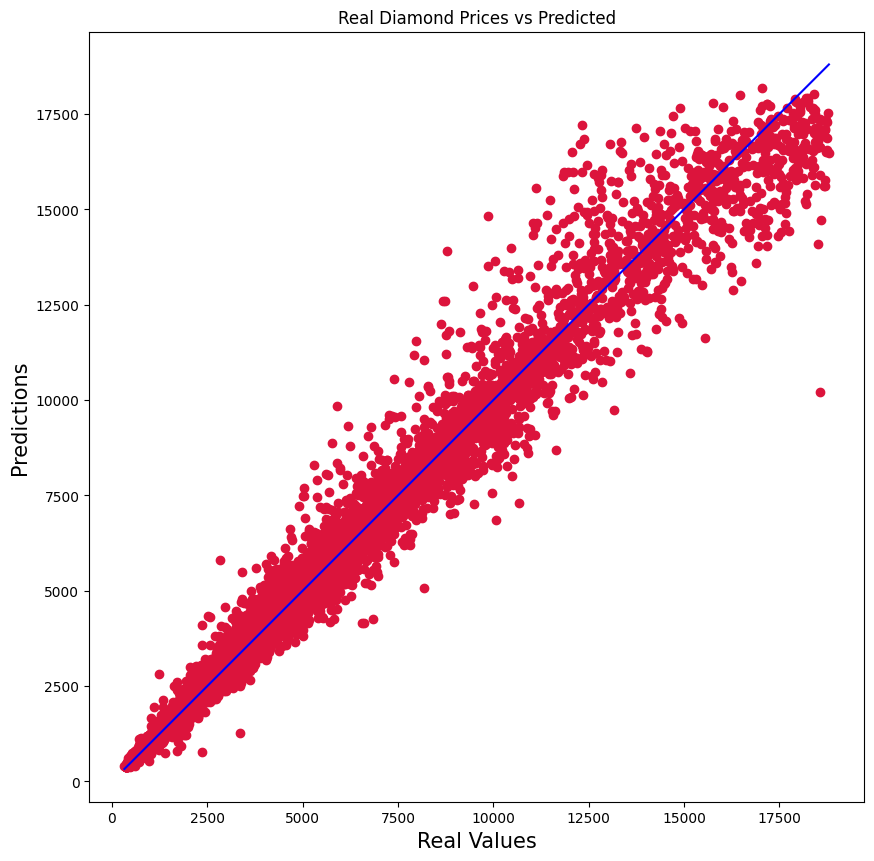

In [31]:
# Let's conjure the figure and the enchanted plot
plt.figure(figsize=(10, 10))

# Unveiling the true magic of the model by plotting predictions vs actual values
plt.scatter(y_test, pred, c='crimson')
plt.title("Real Diamond Prices vs Predicted")

# A reference line for perfect predictions
p1 = max(max(y_test), max(pred))
p2 = min(min(y_test), min(pred))
plt.plot([p1, p2], [p1, p2], 'b-')

# Labels and title to bring clarity to the magical visualization
plt.xlabel('Real Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


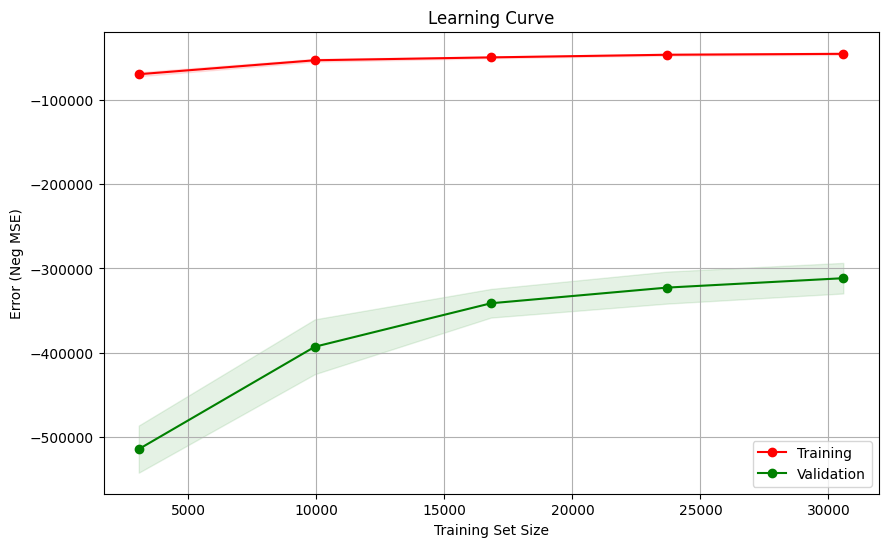

In [34]:
# Define a function to cast the learning curve spell
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation")

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Error (Neg MSE)")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Call the function with your model and data, invoking the magical learning curve spell
plot_learning_curve(modelo_5, X_train, y_train)


In [35]:
# Let's cast a spell to summon the suspicious DataFrame from the depths of the CSV file
df_suspicious = pd.read_csv('df_suspicious.csv')

# Unveil the secrets of the suspicious DataFrame
df_suspicious.info()

# Now, let's summon the trained model from its enchanted slumber
modelo = modelo_5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963 entries, 0 to 2962
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         2962 non-null   float64
 1   longitude        2963 non-null   float64
 2   carat            2963 non-null   float64
 3   cut              2963 non-null   object 
 4   color            2963 non-null   object 
 5   clarity          2963 non-null   object 
 6   depth            1 non-null      float64
 7   table            2963 non-null   float64
 8   price            2963 non-null   int64  
 9   x_length         1873 non-null   float64
 10  y_width          2378 non-null   float64
 11  z_depth          2963 non-null   float64
 12  cut_encoded      2963 non-null   int64  
 13  color_encoded    2963 non-null   int64  
 14  clarity_encoded  2963 non-null   int64  
dtypes: float64(8), int64(4), object(3)
memory usage: 347.4+ KB


In [36]:
# Let's cast a spell to filter only the features used to train the model
features = ['carat', 'depth', 'table', 'x_length', 'y_width', 'z_depth', 'cut_encoded', 'color_encoded', 'clarity_encoded']

# Select only the relevant features
X_diamonds = df_suspicious[features]

# Impute missing values using the mean of each feature
imputer = SimpleImputer(strategy='mean')
X_diamonds_imputed = imputer.fit_transform(X_diamonds)

# Make predictions of diamond prices
predictions = modelo.predict(X_diamonds_imputed)

# Calculate the 5th and 95th percentiles of the predictions to establish thresholds
percentile_5 = np.percentile(predictions, 5)
percentile_95 = np.percentile(predictions, 95)

# Identify values that are outside the expected range
out_of_range_values = df_suspicious[(predictions > percentile_95) | (predictions < percentile_5)]

# Print the values outside the expected range
print("Values outside the expected range:")
print(out_of_range_values)
print("5th Percentile:", percentile_5)
print("95th Percentile:", percentile_95)

# Save the found diamonds to an Excel file
out_of_range_values.to_excel('diamonds_found.xlsx', index=False)

c:\Users\EGiov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Values outside the expected range:
       latitude   longitude  carat        cut color clarity  depth  table  \
0     41.600556  -93.608889   0.30  Very Good     J     SI1    NaN   59.0   
31    30.266944  -97.742778   0.34      Ideal     E     SI1    NaN   54.0   
33    39.395000  -86.562500   0.33    Premium     I     SI1    NaN   59.0   
100   47.606389 -122.330833   0.32    Premium     H     VS1    NaN   58.0   
159   46.216667  -63.483333   0.26  Very Good     E    VVS2    NaN   61.0   
...         ...         ...    ...        ...   ...     ...    ...    ...   
2845  42.331389  -83.045833   0.30      Ideal     H     VS1    NaN   56.0   
2846  41.196944  -75.928611   0.31      Ideal     E     SI1    NaN   55.0   
2887  11.016845   76.955832   0.24  Very Good     F    VVS2    NaN   58.0   
2912  35.226944  -80.843333   0.30    Premium     D     SI1    NaN   59.0   
2943  31.476111  -98.151667   0.35      Ideal     I     VS1    NaN   56.0   

      price  x_length  y_width  z_depth 

In [37]:
# Let's cast a spell to find the null values in the 'latitude' column
null_values = df_suspicious[df_suspicious['latitude'].isnull()]

# Display the null values and their corresponding rows
print("Null values in the 'latitude' column and their corresponding rows:")
display(null_values)

# Save the null values to the same Excel file in a new sheet
with pd.ExcelWriter('diamonds_found.xlsx', mode='a', engine='openpyxl') as writer:
    null_values.to_excel(writer, index=False, sheet_name='Null_Values_Latitude')


Null values in the 'latitude' column and their corresponding rows:


,latitude,longitude,carat,cut,color,clarity,depth,table,price,x_length,y_width,z_depth,cut_encoded,color_encoded,clarity_encoded
2644,NaN,-105.624152,0.7,Fair,F,SI2,64.6,57.0,1947,5.6,5.57,3.61,0,2,3


In [38]:
# Let's cast a spell to load the Excel file
xls = pd.ExcelFile('diamonds_found.xlsx')

# Read the data from the first sheet
df_found_diamonds = pd.read_excel(xls, 'Sheet1') 

# Read the data from the second sheet
df_null_values = pd.read_excel(xls, 'Null_Values_Latitude')

# Concatenate the DataFrames into one
df_complete = pd.concat([df_null_values, df_found_diamonds])

# Display all the information
display(df_complete)


,latitude,longitude,carat,cut,color,clarity,depth,table,price,x_length,y_width,z_depth,cut_encoded,color_encoded,clarity_encoded
0,NaN,-105.624152,0.70,Fair,F,SI2,64.6,57.0,1947,5.60,5.57,3.61,0,2,3
0,41.600556,-93.608889,0.30,Very Good,J,SI1,NaN,59.0,351,4.21,4.27,2.66,4,6,2
1,30.266944,-97.742778,0.34,Ideal,E,SI1,NaN,54.0,556,4.47,4.50,2.79,2,1,2
2,39.395000,-86.562500,0.33,Premium,I,SI1,NaN,59.0,557,4.54,4.50,2.73,3,5,2
3,47.606389,-122.330833,0.32,Premium,H,VS1,NaN,58.0,561,4.34,4.39,2.72,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,42.331389,-83.045833,0.30,Ideal,H,VS1,NaN,56.0,545,4.28,4.32,2.67,2,4,4
294,41.196944,-75.928611,0.31,Ideal,E,SI1,NaN,55.0,547,4.39,4.42,2.71,2,1,2
295,11.016845,76.955832,0.24,Very Good,F,VVS2,NaN,58.0,552,3.95,3.98,2.47,4,2,7
296,35.226944,-80.843333,0.30,Premium,D,SI1,NaN,59.0,552,4.34,4.37,2.60,3,0,2


In [39]:
# Let's cast a spell to get the counts of values in the 'color', 'cut', and 'clarity' columns
counts_color = df_complete['color'].value_counts()
counts_cut = df_complete['cut'].value_counts()
counts_clarity = df_complete['clarity'].value_counts()

# Create figures for the charts, summoning magical bar charts
fig_color = go.Figure(data=[go.Bar(x=counts_color.index, y=counts_color.values, marker_color='skyblue')])
fig_cut = go.Figure(data=[go.Bar(x=counts_cut.index, y=counts_cut.values, marker_color='salmon')])
fig_clarity = go.Figure(data=[go.Bar(x=counts_clarity.index, y=counts_clarity.values, marker_color='lightgreen')])

# Configure the layout and labels, adding a touch of magic to the charts
fig_color.update_layout(title='Count of Colors', xaxis_title='Color', yaxis_title='Count')
fig_cut.update_layout(title='Count of Cuts', xaxis_title='Cut', yaxis_title='Count')
fig_clarity.update_layout(title='Count of Clarities', xaxis_title='Clarity', yaxis_title='Count')

# Display the magical charts
fig_color.show()
fig_cut.show()
fig_clarity.show()


In [40]:
# Scatter Plot: Price vs Weight (carat), revealing the magical relationship between price and weight
scatter_fig = px.scatter(df_complete, x='carat', y='price', title='Price vs Weight of Diamonds', 
                         labels={'carat': 'Weight (carat)', 'price': 'Price'})
scatter_fig.show()

# Histogram: Distribution of diamond prices, unveiling the mystical distribution of prices
hist_fig = px.histogram(df_complete, x='price', nbins=30, title='Distribution of Diamond Prices', 
                        labels={'price': 'Price', 'count': 'Frequency'})
hist_fig.show()

# Scatter Plot by Colors: Price vs Weight of Diamonds by Color, adding a touch of color magic
scatter_color_fig = px.scatter(df_complete, x='carat', y='price', color='color', title='Price vs Weight of Diamonds by Color',
                               labels={'carat': 'Weight (carat)', 'price': 'Price'})
scatter_color_fig.show()

# Scatter Plot by Clarities: Price vs Weight of Diamonds by Clarity, unveiling the clarity of prices
scatter_clarity_fig = px.scatter(df_complete, x='carat', y='price', color='clarity', title='Price vs Weight of Diamonds by Clarity',
                                 labels={'carat': 'Weight (carat)', 'price': 'Price'})
scatter_clarity_fig.show()

# Scatter Plot by Cuts: Price vs Weight of Diamonds by Cut, revealing the enchanting cuts of prices
scatter_cut_fig = px.scatter(df_complete, x='carat', y='price', color='cut', title='Price vs Weight of Diamonds by Cut',
                             labels={'carat': 'Weight (carat)', 'price': 'Price'})
scatter_cut_fig.show()

# Calculate the total carats of stolen diamonds and the total price
total_stolen_diamonds = df_complete['carat'].sum()
total_stolen_price = df_complete['price'].sum()

# Print the relevant information, revealing the total stolen treasures
print(f"Total stolen diamonds: {total_stolen_diamonds} carats")
print(f"Total price of stolen diamonds: ${total_stolen_price}")


Total stolen diamonds: 331.71000000000004 carats
Total price of stolen diamonds: $2311543
